In [11]:
from nuimages import NuImages

In [12]:
nuim = NuImages(dataroot='/media/parashuram/AutoData/nuImagesMini/', version='v1.0-test', verbose=True, lazy=False) 

Loading nuImages tables for version v1.0-test...
Loaded 12 attribute(s) in 0.000s,
Loaded 346 calibrated_sensor(s) in 0.002s,
Loaded 25 category(s) in 0.000s,
Loaded 126276 ego_pose(s) in 0.710s,
Loaded 60 log(s) in 0.000s,
Loaded 0 object_ann(s) in 0.000s,
Loaded 9752 sample(s) in 0.010s,
Loaded 126276 sample_data(s) in 0.384s,
Loaded 6 sensor(s) in 0.000s,
Loaded 0 surface_ann(s) in 0.000s,
Done loading in 1.107 seconds (lazy=False).


In [13]:
nuim.table_names

['attribute',
 'calibrated_sensor',
 'category',
 'ego_pose',
 'log',
 'object_ann',
 'sample',
 'sample_data',
 'sensor',
 'surface_ann']

In [14]:
nuim.category[0]

{'token': '63a94dfa99bb47529567cd90d3b58384',
 'name': 'animal',
 'description': 'All animals, e.g. cats, rats, dogs, deer, birds.'}

In [15]:
sample_idx = 0
sample = nuim.sample[sample_idx]
sample

{'token': '00133a0ece904045aabb1f31e848c0c2',
 'timestamp': 1519370664589866,
 'log_token': 'ff523ee87c5a46b0bca8efeca4874bd4',
 'key_camera_token': '8ce9f4cf013446858492b49d815c93b4'}

In [16]:
sample = nuim.get('sample', sample['token'])
sample

{'token': '00133a0ece904045aabb1f31e848c0c2',
 'timestamp': 1519370664589866,
 'log_token': 'ff523ee87c5a46b0bca8efeca4874bd4',
 'key_camera_token': '8ce9f4cf013446858492b49d815c93b4'}

In [17]:
sample_idx_check = nuim.getind('sample', sample['token'])
assert sample_idx == sample_idx_check

In [18]:
key_camera_token = sample['key_camera_token']
print(key_camera_token)

8ce9f4cf013446858492b49d815c93b4


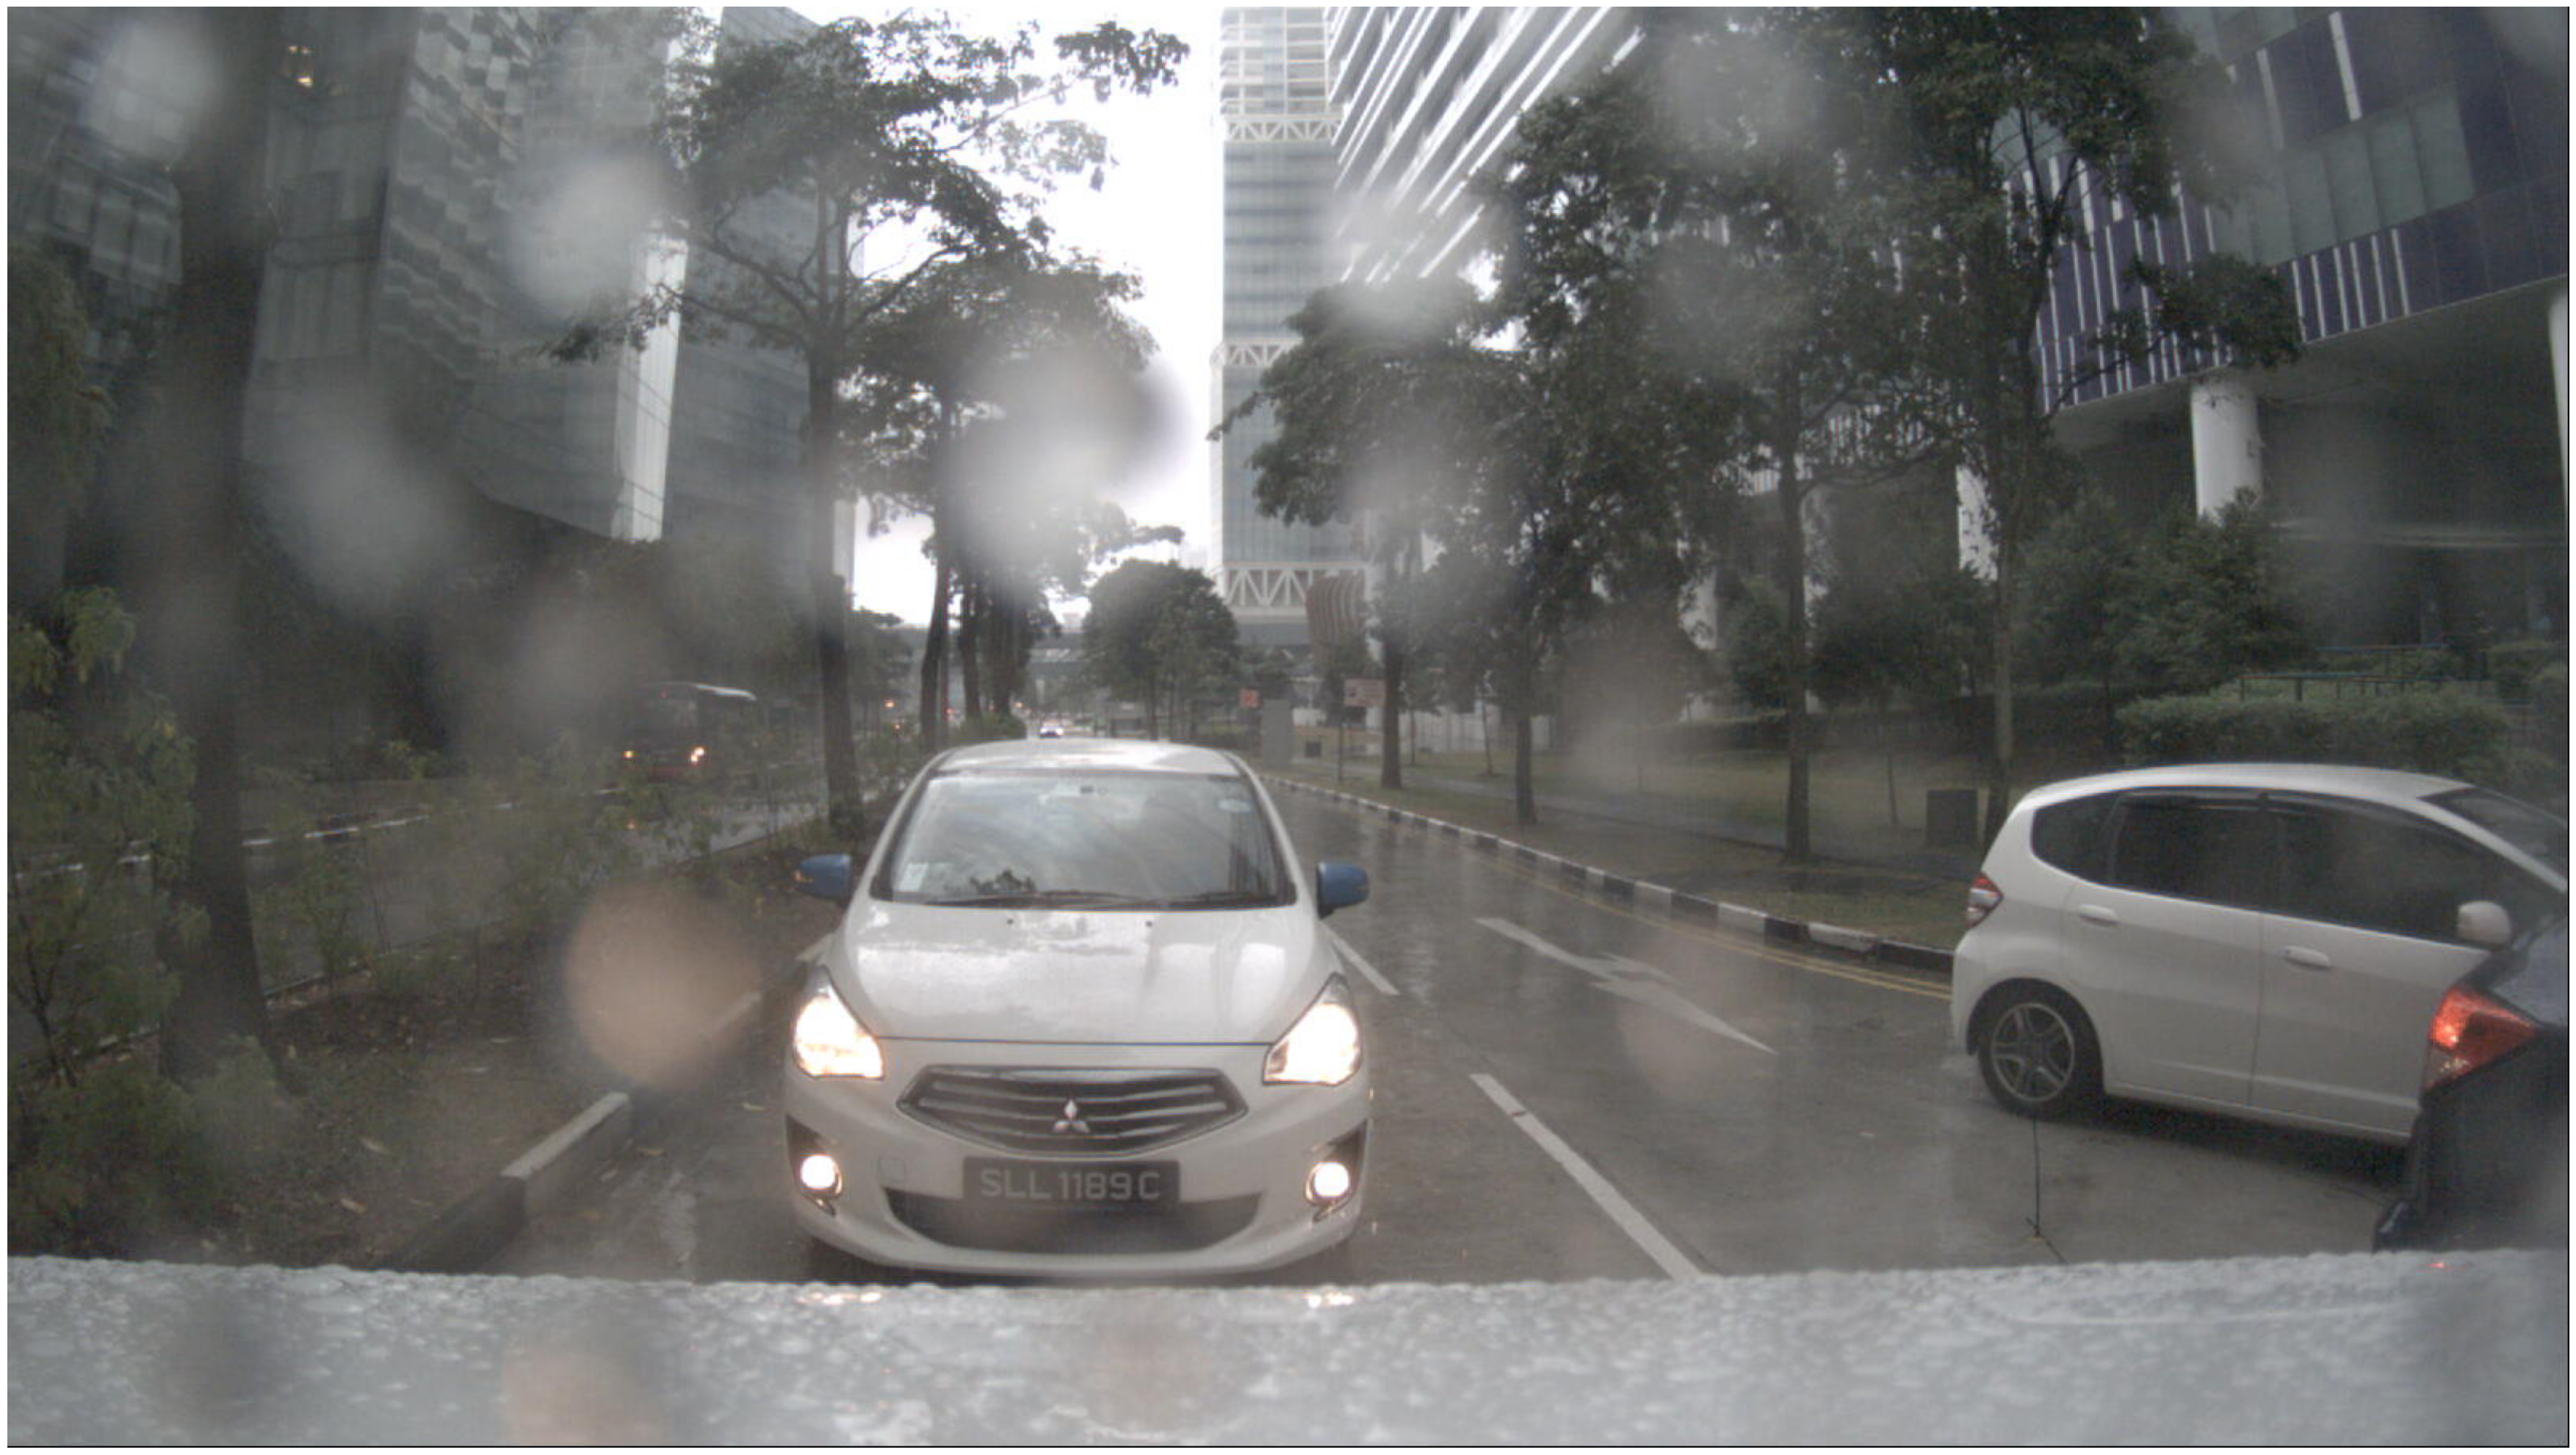

In [19]:
nuim.render_image(key_camera_token, annotation_type='all',
                  with_category=True, with_attributes=True, box_line_width=-1, render_scale=5)

In [20]:
object_tokens, surface_tokens = nuim.list_anns(sample['token'])

Printing object annotations:

Printing surface annotations:


In [21]:
nuim.render_image(key_camera_token, with_category=True, object_tokens=[object_tokens[0]], surface_tokens=[surface_tokens[0]])

IndexError: list index out of range

In [ ]:
nuim.render_image(key_camera_token, with_category=True, surface_tokens=[surface_tokens[0]])

IndexError: list index out of range

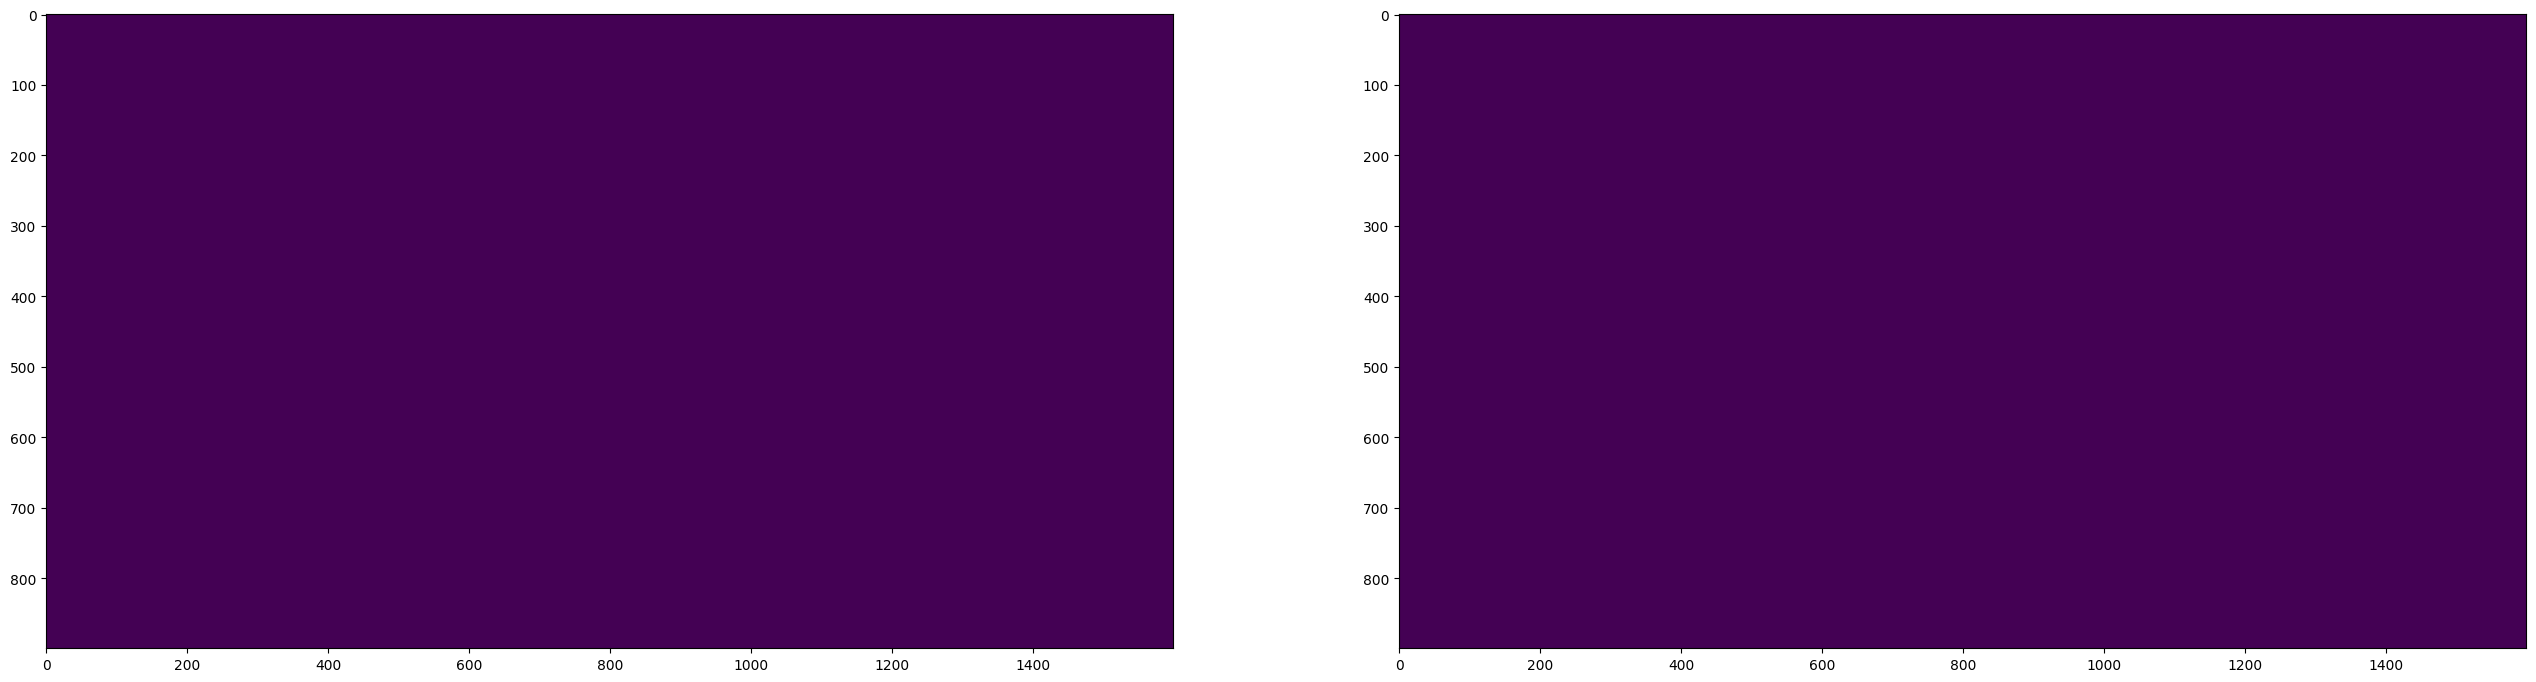

In [ ]:
import matplotlib.pyplot as plt

semantic_mask, instance_mask = nuim.get_segmentation(key_camera_token)

plt.figure(figsize=(32, 9))

plt.subplot(1, 2, 1)
plt.imshow(semantic_mask)
plt.subplot(1, 2, 2)
plt.imshow(instance_mask)

plt.show()

In [ ]:
nuim.list_sample_content(sample['token'])


Listing sample content...
Rel. time	Sample_data token
     -3.0	739cc346ae5f4de28a56a0d079d3da9a
     -2.5	f685694bb76340918af49d8fdc7ea541
     -2.0	ef72312e1349475da92907d03dc2dbd5
     -1.5	72a63d6439c443c181a38e0d4a347476
     -1.0	606925718f894270be5e52d3fed99363
     -0.5	bd3f913c01b44290b388e5d7481aee95
      0.0	8ce9f4cf013446858492b49d815c93b4
      0.5	30bc7bfa2cd549dba2e004c83c7f10db
      1.0	9ab9f09fc66a4d2d8c55085eced71187
      1.5	af0938da2c044f4a83b8813d97352046
      2.0	17160a6cb8f34f268aa0ee43a1c9ce83
      2.5	0a0c63057e1a4439947a9384518c2283
      3.0	7fca5f5bec6b41d5ac958444311c818f


In [ ]:
next_camera_token = nuim.get('sample_data', key_camera_token)['next']
next_camera_token

'30bc7bfa2cd549dba2e004c83c7f10db'

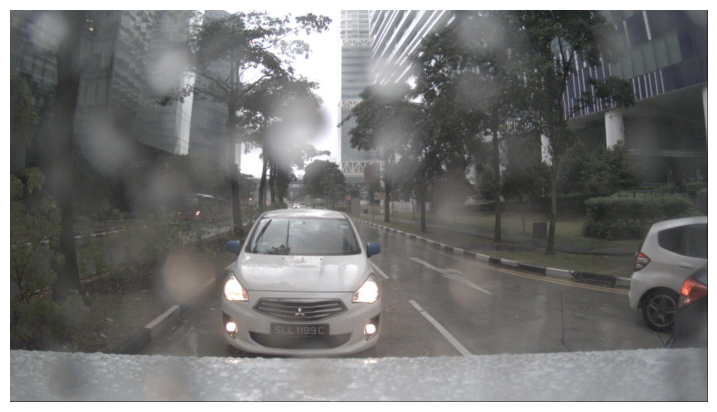

In [ ]:
try:
    nuim.render_image(next_camera_token, annotation_type='none')
except Exception as e:
    print('As expected, we encountered this error:', e)

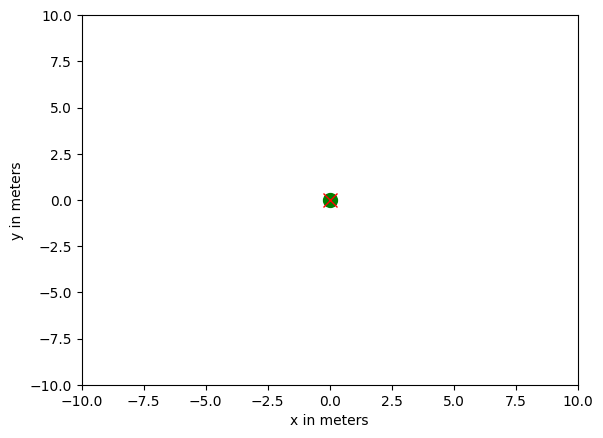

In [ ]:
nuim.render_trajectory(sample['token'], rotation_yaw=0, center_key_pose=True)

In [ ]:
nuim.list_logs()


Samples Log                           Location                
  1185 n003-2018-01-02-11-48-43+0800 singapore-onenorth      
   191 n003-2018-01-03-10-58-34+0800 singapore-onenorth      
    55 n003-2018-01-05-15-47-20+0800 singapore-onenorth      
   284 n003-2018-07-24-10-24-06+0800 singapore-onenorth      
    75 n004-2018-01-03-17-22-36+0800 singapore-onenorth      
   318 n004-2018-02-23-15-20-48+0800 singapore-onenorth      
    36 n004-2018-07-03-16-11-09+0800 singapore-queenstown    
    81 n005-2018-07-10-17-20-36+0800 singapore-onenorth      
   104 n005-2018-07-12-10-34-59+0800 singapore-onenorth      
   150 n006-2018-09-17-11-31-15-0400 boston-seaport          
    50 n006-2018-09-17-11-45-52-0400 boston-seaport          
   196 n006-2018-09-17-13-56-03-0400 boston-seaport          
   926 n008-2018-05-15-14-32-56-0400 boston-seaport          
   140 n008-2018-07-30-14-34-53-0400 boston-seaport          
    53 n008-2018-08-21-15-34-11-0400 boston-seaport          
    22

In [ ]:
nuim.list_categories(sort_by='object_freq')


Object_anns Surface_anns Name                     Description                                     


In [ ]:
sample_tokens = [nuim.sample[9]['token']]
nuim.list_categories(sample_tokens=sample_tokens)


Object_anns Surface_anns Name                     Description                                     


In [ ]:
nuim.list_attributes(sort_by='freq')


Annotations Name                     Description                                     
          0 cycle.with_rider         There is a rider on the bicycle or motorcycle.  
          0 cycle.without_rider      There is NO rider on the bicycle or motorcycle. 
          0 pedestrian.moving        The human is moving.                            
          0 pedestrian.sitting_lying The human is sitting or lying down.             
          0 pedestrian.standing      The human is standing.                          
          0 vehicle.moving           Vehicle is moving.                              
          0 vehicle.parked           Vehicle is stationary (usually for longer durati
          0 vehicle.stopped          Vehicle, with a driver/rider in/on it, is curren
          0 vehicle_light.emergency. Vehicle is flashing emergency lights.           
          0 vehicle_light.emergency. Vehicle is not flashing emergency lights.       
          0 vertical_position.off_gr Object is not on

In [ ]:
nuim.list_sample_data_histogram()


Listing sample_data frequencies..
# images	# samples
       7	1
       8	46
       9	13
      10	17
      11	12
      12	17
      13	9646
